In [ ]:
!nvidia-smi

Thu Aug 29 01:17:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from tensorflow.keras.applications import ResNet50  # Change to ResNet-50
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/ACPS PROJECT - MSDS/DATASETS/MSDS-Iv3/train'
valid_path = '/content/drive/MyDrive/ACPS PROJECT - MSDS/DATASETS/MSDS-Iv3/test'


In [ ]:
# Load the ResNet-50 model with pre-trained ImageNet weights
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze the layers in ResNet-50
for layer in resnet.layers:
    layer.trainable = False

# Add custom layers on top of ResNet-50
x = Flatten()(resnet.output)
prediction = Dense(len(glob(train_path + '/*')), activation='softmax')(x)

# Create the model
model = Model(inputs=resnet.input, outputs=prediction)

# Display the model's architecture
model.summary()

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,888,771 (91.13 MB)

 Trainable params: 301,059 (1.15 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')


Found 2181 images belonging to 3 classes.
Found 26 images belonging to 3 classes.


In [ ]:
# Fit the model
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 36s 464ms/step - accuracy: 0.9217 - loss: 0.2724 - val_accuracy: 0.6538 - val_loss: 5.4359
Epoch 2/10


AttributeError: 'NoneType' object has no attribute 'items'

In [ ]:
# Fit the model
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set, steps=len(test_set))

# Print the accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 36s 478ms/step - accuracy: 0.9379 - loss: 0.2155 - val_accuracy: 0.6923 - val_loss: 1.8885
Epoch 2/10


AttributeError: 'NoneType' object has no attribute 'items'

In [ ]:
# Check the validation dataset
for images, labels in test_set:
    print(f"Validation batch shape: {images.shape}")
    print(f"Validation labels shape: {labels.shape}")
    break  # Just checking the first batch

# Fit the model with adjusted steps
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set, steps=len(test_set))

# Print the accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Validation batch shape: (26, 224, 224, 3)
Validation labels shape: (26, 3)
Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 35s 465ms/step - accuracy: 0.8328 - loss: 0.4121 - val_accuracy: 0.6538 - val_loss: 2.0881
Epoch 2/10


AttributeError: 'NoneType' object has no attribute 'items'

In [ ]:
# Define batch size
batch_size = 16  # Reduce if necessary

# Recreate the ImageDataGenerators with the new batch size
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Reload the training and validation sets
training_set = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
test_set = test_datagen.flow_from_directory(valid_path, target_size=(224, 224), batch_size=batch_size, class_mode='categorical')

# Calculate steps_per_epoch and validation_steps manually
steps_per_epoch = len(training_set)
validation_steps = len(test_set)

# Fit the model with manually set steps
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set, steps=validation_steps)

# Print the accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Found 2181 images belonging to 3 classes.
Found 26 images belonging to 3 classes.
Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 45s 290ms/step - accuracy: 0.8771 - loss: 0.3349 - val_accuracy: 0.6923 - val_loss: 6.7654
Epoch 2/10


AttributeError: 'NoneType' object has no attribute 'items'

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ACPS PROJECT - MSDS/DATASETS/MSDS-Iv3/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2181 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ACPS PROJECT - MSDS/DATASETS/MSDS-Iv3/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 26 images belonging to 3 classes.


In [ ]:
# Fit the model with manually set steps
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)


Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 229ms/step - accuracy: 0.9255 - loss: 0.3172 - val_accuracy: 0.6538 - val_loss: 1.4174
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 229ms/step - accuracy: 0.8957 - loss: 0.2934 - val_accuracy: 0.6538 - val_loss: 3.4260
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 245ms/step - accuracy: 0.8870 - loss: 0.3600 - val_accuracy: 0.6538 - val_loss: 4.5801
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 39s 235ms/step - accuracy: 0.9073 - loss: 0.2542 - val_accuracy: 0.5385 - val_loss: 3.2268
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 235ms/step - accuracy: 0.8787 - loss: 0.3175 - val_accuracy: 0.6923 - val_loss: 1.4965
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 228ms/step - accuracy: 0.9251 - loss: 0.2010 - val_accuracy: 0.6923 - val_loss: 1.6869
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 229ms/step - accuracy: 0.8702 - loss: 0.3490 - val_accuracy: 0.4231 - val_loss: 2.7468
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 243ms/step - accuracy: 0.8579 - loss: 0

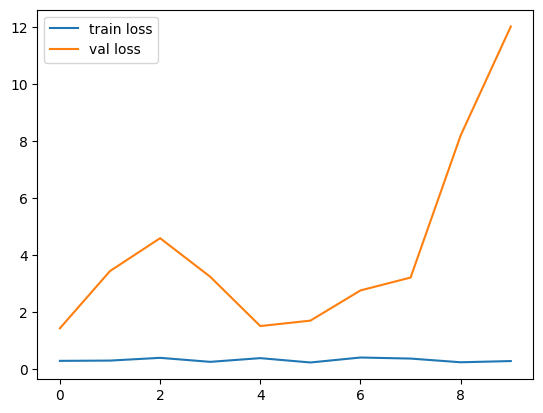

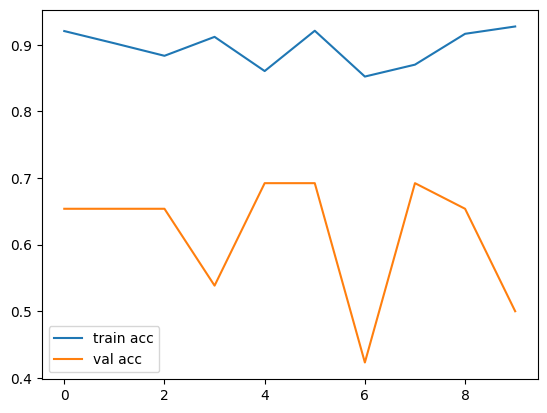

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


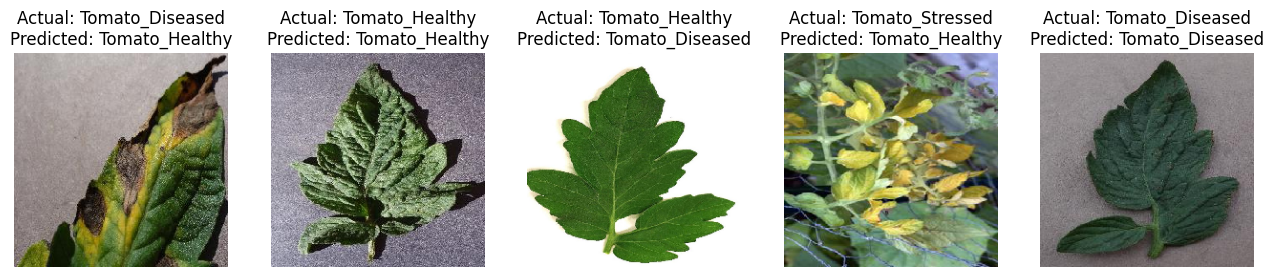

In [ ]:
# Define class names based on your dataset
class_names = ['Tomato_Diseased', 'Tomato_Healthy', 'Tomato_Stressed']

# Get a batch of validation images and their labels
images, labels = next(test_set)

# Predict the labels for the validation images
predicted_labels = model.predict(images)

# Define a function to decode the one-hot encoded labels
def decode_label(label):
    return class_names[np.argmax(label)]

# Define a function to plot images with their actual and predicted labels
def plot_images(images, labels, predicted_labels, num_images=5):
    plt.figure(figsize=(16, 8))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        actual_label = decode_label(labels[i])
        predicted_label = decode_label(predicted_labels[i])
        plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
        plt.axis('off')
    plt.show()

# Plot the images with their actual and predicted labels
plot_images(images, labels, predicted_labels, num_images=5)


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set, steps=len(test_set))

# Print the accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.5000 - loss: 12.0090
Test Accuracy: 50.00%


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set, steps=len(test_set))

# Print the accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.5000 - loss: 12.0090
Test Accuracy: 50.00%


In [ ]:
# Fit the model with manually set steps
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 229ms/step - accuracy: 0.9323 - loss: 0.1909 - val_accuracy: 0.6923 - val_loss: 3.3921
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 237ms/step - accuracy: 0.9398 - loss: 0.2033 - val_accuracy: 0.7308 - val_loss: 1.6077
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 229ms/step - accuracy: 0.9423 - loss: 0.1551 - val_accuracy: 0.6538 - val_loss: 4.1290
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 236ms/step - accuracy: 0.9182 - loss: 0.2492 - val_accuracy: 0.6538 - val_loss: 3.8205
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 238ms/step - accuracy: 0.9071 - loss: 0.2667 - val_accuracy: 0.6538 - val_loss: 8.2932
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 231ms/step - accuracy: 0.9291 - loss: 0.2546 - val_accuracy: 0.7308 - val_loss: 1.7474
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 229ms/step - accuracy: 0.9600 - loss: 0.1229 - val_accuracy: 0.6923 - val_loss: 2.7552
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 234ms/step - accuracy: 0.9403 - loss: 0

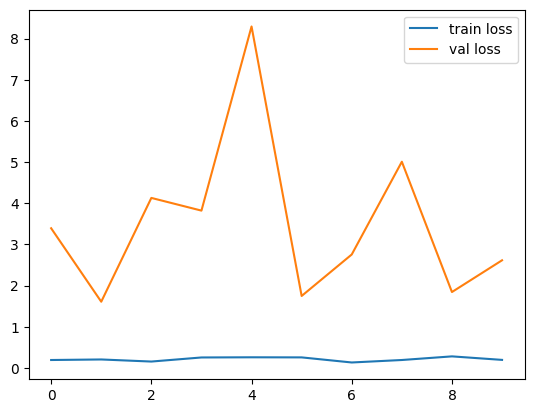

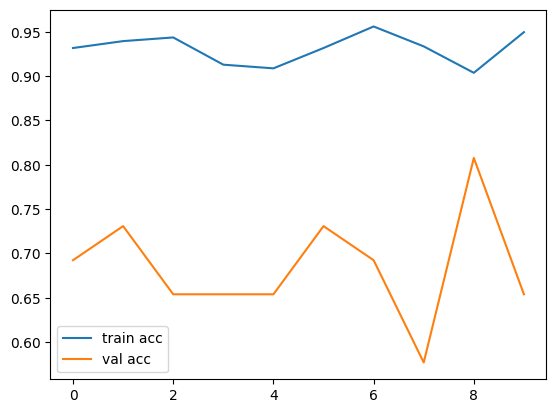

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


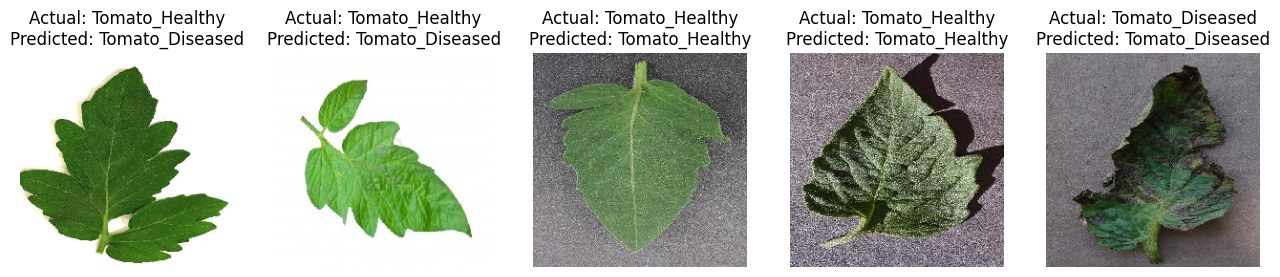

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.6538 - loss: 2.6141
Test Accuracy: 65.38%


In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


# Define class names based on your dataset
class_names = ['Tomato_Diseased', 'Tomato_Healthy', 'Tomato_Stressed']

# Get a batch of validation images and their labels
images, labels = next(test_set)

# Predict the labels for the validation images
predicted_labels = model.predict(images)

# Define a function to decode the one-hot encoded labels
def decode_label(label):
    return class_names[np.argmax(label)]

# Define a function to plot images with their actual and predicted labels
def plot_images(images, labels, predicted_labels, num_images=5):
    plt.figure(figsize=(16, 8))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        actual_label = decode_label(labels[i])
        predicted_label = decode_label(predicted_labels[i])
        plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
        plt.axis('off')
    plt.show()

# Plot the images with their actual and predicted labels
plot_images(images, labels, predicted_labels, num_images=5)


# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set, steps=len(test_set))

# Print the accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")



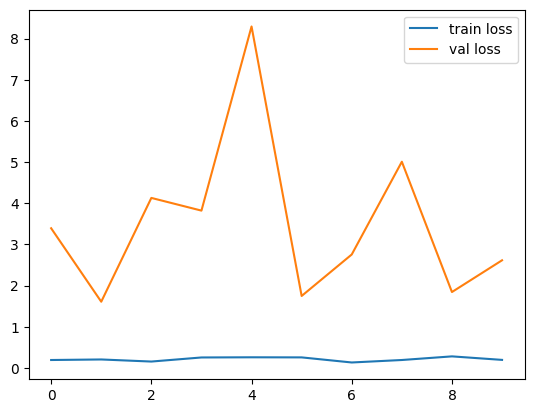

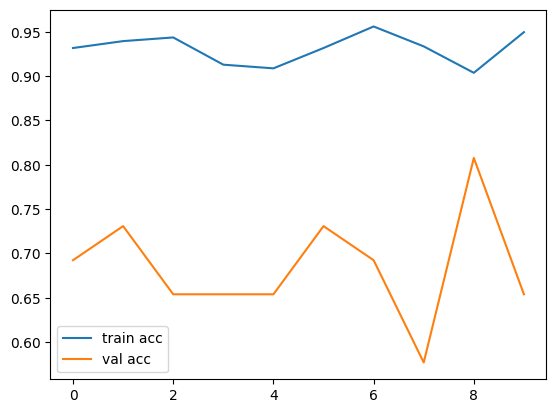

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


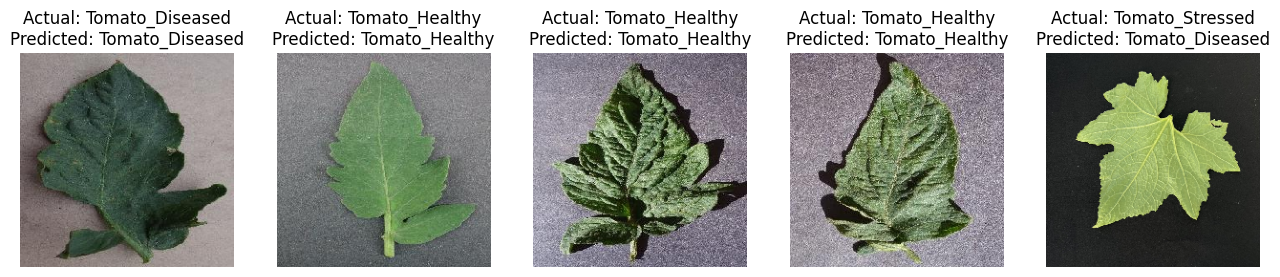

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.6538 - loss: 2.6141
Test Accuracy: 65.38%


In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


# Define class names based on your dataset
class_names = ['Tomato_Diseased', 'Tomato_Healthy', 'Tomato_Stressed']

# Get a batch of validation images and their labels
images, labels = next(test_set)

# Predict the labels for the validation images
predicted_labels = model.predict(images)

# Define a function to decode the one-hot encoded labels
def decode_label(label):
    return class_names[np.argmax(label)]

# Define a function to plot images with their actual and predicted labels
def plot_images(images, labels, predicted_labels, num_images=5):
    plt.figure(figsize=(16, 8))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        actual_label = decode_label(labels[i])
        predicted_label = decode_label(predicted_labels[i])
        plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
        plt.axis('off')
    plt.show()

# Plot the images with their actual and predicted labels
plot_images(images, labels, predicted_labels, num_images=5)


# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set, steps=len(test_set))

# Print the accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

